In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
#import tensorflow_datasets as tfds

In [13]:
# ! pip install opencv-python==4.6.0.66

4.6.0


In [3]:
%cd "D:\DL gesty"
train = pd.read_csv("sign_mnist_train.csv")
train.head()

d:\DL gesty


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test = pd.read_csv("sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
train['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

#  Preprocessing, model i wczytanie kamery

In [6]:
labels = train['label'].values

In [7]:
#View the unique Labels, 24 in total (no 9)  
unique_val = np.array (labels) 
np. unique (unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [8]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis= 1, inplace=True)

In [9]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns 
images =train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images.shape

(27455, 784)

In [10]:
 #hot one encode our Labels. 
from sklearn.preprocessing import LabelBinarizer
label_binrizer= LabelBinarizer() 
labels = label_binrizer.fit_transform(labels)

In [11]:
#View our Labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


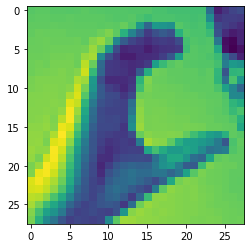

In [31]:
#Inspect an image

index= 2
print(labels [index])
plt.imshow(images [index].reshape(28,28))

In [13]:
import cv2
for i in range(0,10):
    rand= np.random.randint(0, len(images)) 
    input_im =images [rand]

    sample= input_im.reshape(28,28).astype (np. uint8)
    sample =cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample) 
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
#Split our data into x_train, x_test, y_train and y_test 2 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(images, labels, test_size = 0.3, random_state= 101)

In [20]:
#Start Loading our tensorFlow modules and define our batch size etc 2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128 
num_classes = 24
epochs= 10

In [32]:
#Scale our images
x_train = x_train / 255 
x_test = x_test / 255

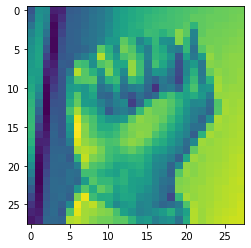

In [33]:
#Reshape them into the size required by TF and Keras 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [35]:
x_train[6,].shape

(28, 28, 1)

In [36]:
# Architektura z wykorzystaniem modelu sekwencyjnego

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Dense (200, activation = 'relu', input_shape=(28,28,1)),Flatten(),
    Dense (150, activation = 'relu'), Dense (24, activation = 'softmax')
])

In [37]:
model.summary ()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 28, 28, 200)       400       
                                                                 
 flatten_3 (Flatten)         (None, 156800)            0         
                                                                 
 dense_11 (Dense)            (None, 150)               23520150  
                                                                 
 dense_12 (Dense)            (None, 24)                3624      
                                                                 
Total params: 23,524,174
Trainable params: 23,524,174
Non-trainable params: 0
_________________________________________________________________


## Kompilacja modelu
W tym kroku skompilujemy model z **optymalizatorem i funkcją strat**:

In [38]:
from keras.optimizers import Adam

opt =Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Szkolenie modelu
Dotychczas nie pokazaliśmy modelowi żadnych danych, lecz jedynie skonfigurowaliśmy architek turę i skompilowaliśmy model z funkcją strat i optymalizatorem.
Aby wyszkolić model, wystarczy wywołać metodę fit:

In [39]:
history=model.fit(x_train ,    # Surowe dane obrazu.
    y_train ,          # Etykiety klasy w kodzie 1 z n.
    validation_data=(x_test, y_test),
    batch_size = 128,   # batch_size określa liczbę obserwacji, które zostaną przekazane do sieci na każdym etapie szkolenia
    epochs = 5,       # epochs określa, ile razy sieci zostaną pokazane pełne dane treningowe.
    shuffle= True,      # Jeśli shuffle = True, partie będą pobierane losowo, bez wymiany z danych treningowych na każ dym etapie szkolenia.
    #callbacks=[tensorboard_callback]
)

Epoch 1/5
151/151 [==============================] - 42s 272ms/step - loss: 2.6559 - accuracy: 0.2706 - val_loss: 2.0628 - val_accuracy: 0.3893
Epoch 2/5
151/151 [==============================] - 39s 261ms/step - loss: 1.5650 - accuracy: 0.5509 - val_loss: 1.2445 - val_accuracy: 0.6307
Epoch 3/5
151/151 [==============================] - 39s 259ms/step - loss: 1.0917 - accuracy: 0.6783 - val_loss: 0.9131 - val_accuracy: 0.7455
Epoch 4/5
151/151 [==============================] - 39s 258ms/step - loss: 0.8244 - accuracy: 0.7604 - val_loss: 0.7712 - val_accuracy: 0.7645
Epoch 5/5
151/151 [==============================] - 39s 259ms/step - loss: 0.6615 - accuracy: 0.8054 - val_loss: 0.6384 - val_accuracy: 0.8047


In [40]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


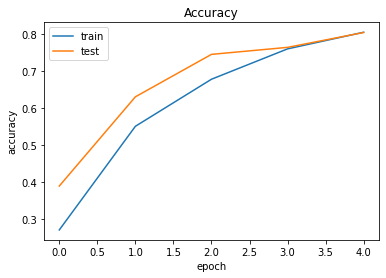

In [41]:
# View our training history graphically

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy') 
plt.legend([ 'train', 'test'])
plt.show()

In [42]:
# Reshape our test data so that we can evaluate it's performance on unseen 
test_labels = test['label']
test.drop('label', axis= 1, inplace=True)
test_images = test.values

test_images = np.array([np.reshape(i, (28, 28)) for i in test_images]) 
test_images= np.array([i.flatten() for i in test_images])

test_labels= label_binrizer.fit_transform(test_labels)

test_images= test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 6s 26ms/step


In [43]:
# Get our accuracy score 2 
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())
accuracy_score(test_labels, y_pred.round())

0.5504740658114892

In [45]:
# Create function to match Label to Letter 
def getLetter (result):
    classLabels:{0:'A', 1:'B',2: 'C',3: 'D',4:'E',5: 'F',6: 'G',7: 'H',8:'I',9: 'K',10:'L',11:'M',12: 'N',13: '0',14: 'Q',15: 'P',16: 'R',17: 'S', 18: 'T',19: 'U',20: 'V',21: 'W',22: 'X',23: 'Y'}
    try:
        res = int(result) 
        return classLabels [res]
    except: 
        return "Error"

In [57]:
#

import argparse
import cv2

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True,
   help = "path to the image file")
args = vars(ap.parse_args())

# load the image from disk and display the width, height,
# and depth
image = cv2.imread(args["image"])
(h, w, d) = image.shape
print("w: {}, h: {}, d: {}".format(w, h, d))

# show the image
cv2.imshow("Image", image)
cv2.waitKey(0)

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [59]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame=cv2.flip(frame, 1)
    # if not ret: break
    #define region of interest 
    
    roi=frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2. INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)
    copy =frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi= roi.reshape(1, 28, 28,1)

    result = str(model.predict_classes(roi, 1, verbose = 0)[0]) 
    cv2.putText(copy, getLetter (result), (300, 100), 
    cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2) 
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:                 #13 is the Enter Key break
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'Sequential' object has no attribute 'predict_classes'